<a href="https://colab.research.google.com/github/tusharsingh9820/Air-Pollution/blob/main/Air_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.pinimg.com/564x/2c/ed/ae/2cedae8d092b7f3e609f0d141cdad365.jpg)
# **About Dataset**
##Datasets on air pollution in India are typically compiled and maintained by various governmental and non-governmental organizations, research institutions, and international agencies. These datasets contain a wealth of information about air quality monitoring, pollutant concentrations.

>## **The columns included in this dataset are:**

* **stn_code:** Station code
* **sampling_date:** Date at which sampling is done.
* **state:** State with respect to the location.
* **location:** City,place name
* **agency:**Bodies who have done hte sampling.
* **type:** Type of area(industrial,residential,sensitive ecogically)
* **so2:**It is a gas produced by burning fossil fuels containing sulfur, and by certain industrial processes. SO2 can lead to respiratory issues and acid rain.The NAAQS for SO2 is 80 µg/m³ averaged over 24 hours.
* **no2:**It is a reddish-brown gas formed by the combustion of fossil fuels, primarily in vehicles and power plants. NO2 contribute to the formation of smog and acid rain.The NAAQS for NO2 is 80 µg/m³ averaged over 24 hours.
* **rspm:**RSPM refers to tiny solid or liquid particles suspended in the air that are small enough to be inhaled into the lungs. These particles can include dust, pollen, soot, and other pollutants. RSPM can cause respiratory problems and other health issues.The NAAQS for PM10 is 100 µg/m³ averaged over 24 hours.
* **spm:**SPM is similar to RSPM but includes a broader range of particle sizes, including larger particles that may not penetrate as deeply into the lungs.The NAAQS for SPM (PM10) is 100 µg/m³ averaged over 24 hours.
* **location_monitoring_station:**Areas of particular location.
* **pm2_5:**PM2.5 refers to particulate matter with a diameter of 2.5 micrometers or smaller. These particles are extremely small and can remain suspended in the air for long periods, allowing them to penetrate deep into the respiratory system when inhaled.24-hour average PM2.5 concentration of 25 µg/m³ (micrograms per cubic meter) is considered safe for human health.
* **date:**Sampling date with day,month,year.

##**Importing the required libraries for EDA**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###**1. Loading the data into the data frame.**

In [ ]:
pollution = pd.read_csv('/content/Air Pollution.csv', encoding='latin-1')
pollution

>#### **Checking the types of data**

In [ ]:
pollution.dtype()

###**2. Create seperate column for month and year**

In [ ]:
pollution['year'] = pd.DatetimeIndex(pollution['date']).year
pollution['month'] = pd.DatetimeIndex(pollution['date']).month

###**3. Function to map months to seasons and to create a new column of seasons.**

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'

In [ ]:
pollution['season'] = pollution['month'].apply(get_season)

###**4. Create dataframe calculating mean of pollutants with repect of months,city,areas.**

In [ ]:
pollution=pollution.groupby(['state', 'location','type', 'year','season'])[ 'so2', 'no2', 'rspm', 'spm', 'pm2_5'].mean().reset_index()

<ipython-input-7-be085c9144dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pollution=pollution.groupby(['state', 'location','type', 'year','season'])[ 'so2', 'no2', 'rspm', 'spm', 'pm2_5'].mean().reset_index()


In [ ]:
pollution

###**5. Selecting top major cities.**

In [ ]:
cities = ["Mumbai", "Delhi", "Bangalore", "Kolkata", "Chennai", "Hyderabad", "Ahmedabad", "Pune", "Surat", "Jaipur",
          "Lucknow", "Kanpur", "Nagpur", "Patna", "Indore", "Thane", "Bhopal", "Visakhapatnam", "Vadodara", "Firozabad",
          "Ludhiana", "Rajkot", "Agra", "Siliguri", "Nashik", "Faridabad", "Patiala", "Meerut", "Kalyan-Dombivali", "Vasai-Virar", "Varanasi", "Srinagar",
          "Dhanbad", "Jodhpur", "Amritsar", "Raipur", "Allahabad", "Coimbatore", "Jabalpur", "Gwalior", "Vijayawada", "Madurai", "Guwahati", "Chandigarh",
          "Hubli-Dharwad", "Amroha", "Moradabad", "Gurgaon", "Aligarh", "Solapur", "Ranchi", "Jalandhar", "Tiruchirappalli", "Bhubaneswar", "Salem", "Warangal",
          "Mira-Bhayandar", "Jalgaon", "Guntur", "Bhiwandi", "Saharanpur", "Gorakhpur", "Bikaner", "Amravati", "Noida", "Jamshedpur", "Bhilai", "Cuttack", "Firozpur",
          "Kochi", "Nellore", "Bhavnagar", "Dehradun", "Durgapur", "Asansol", "Rourkela", "Nanded", "Kolhapur", "Ajmer", "Akola", "Gulbarga", "Jamnagar", "Ujjain", "Loni",
          "Siliguri", "Jhansi", "Ulhasnagar", "Jammu", "Sangli-Miraj & Kupwad", "Mangalore", "Erode", "Belgaum", "Kurnool", "Ambattur", "Rajpur Sonarpur", "Bokaro",
          "South Dumdum", "Bellary", "Patiala", "Gopalpur", "Agartala", "Bhagalpur", "Muzaffarnagar", "Bhatpara", "Panihati", "Latur", "Dhule", "Rohtak", "Korba",
          "Bhilwara", "Brahmapur", "Muzaffarpur", "Ahmednagar", "Mathura", "Kollam", "Avadi", "Kadapa", "Anantapur", "Kamarhati", "Bilaspur", "Shahjahanpur", "Satara",
          "Bijapur", "Sagar", "Rampur", "Shimoga", "Chandrapur", "Junagadh", "Thrissur", "Alwar", "Bardhaman", "Kulti", "Nizamabad", "Parbhani", "Tumkur", "Khammam", "Ozhukarai", "Bihar Sharif",
          "Panipat", "Darbhanga", "Bally", "Aizawl", "Dewas", "Ichalkaranji", "Karnal", "Bathinda", "Jalna", "Eluru", "Barasat", "Kirari Suleman Nagar", "Purnia", "Satna", "Mau", "Sonipat", "Farrukhabad",
          "Sagar", "Rourkela", "Durg", "Imphal", "Ratlam", "Hapur", "Arrah", "Anantapur", "Karimnagar", "Etawah", "Ambarnath", "North Dumdum", "Bharatpur", "Begusarai", "New Delhi", "Gandhidham", "Baranagar",
          "Tiruvottiyur", "Puducherry", "Sikar", "Thoothukudi", "Rewa", "Mirzapur", "Raichur", "Pali","Ramagundam", "Silchar", "Haridwar", "Vijayanagaram", "Tenali", "Nagercoil", "Sri Ganganagar", "Karawal Nagar", "Mango",
          "Thanjavur", "Bulandshahr", "Uluberia", "Katni", "Sambalpur", "Singrauli", "Nadiad", "Secunderabad", "Naihati", "Yamunanagar", "Bidhan Nagar", "Pallavaram", "Bidar", "Munger", "Panchkula", "Burhanpur",
          "Raurkela Industrial Township", "Kharagpur", "Dindigul", "Gandhinagar", "Hospet", "Nangloi Jat", "Malda", "Ongole", "Deoghar", "Chapra", "Haldia", "Khandwa", "Nandyal", "Morena", "Amroha", "Anand",
          "Bhind", "Bhalswa Jahangir Pur", "Madhyamgram", "Bhiwani", "Berhampur", "Ambala", "Morbi", "Fatehpur", "Raebareli", "Khora", "Bhusawal", "Orai", "Bahraich", "Phusro", "Vellore", "Maheshtala", "Srikakulam",
          "Bhimavaram", "Khardah", "Adoni", "Alappuzha", "Baharampur", "Gokal Pur", "Gangtok", "Mhow Cantonment", "Udupi", "Bongaigaon", "Tadepalle", "Jharsuguda", "Salem", "Mancherial", "Balurghat", "Wardha", "Tinsukia", "Kishanganj",
          "Jaunpur", "Madhyamgram", "Suryapet", "Miryalaguda", "Tadipatri", "Karaikudi", "Moradabad", "Hassan", "Bhimavaram", "Shivpuri", "Tiruvannamalai", "Kaithal", "Hazaribagh", "Ulhasnagar", "Bhimavaram", "Sindhnur",
          "Udgir", "Ganjam", "Bhatapara", "Saharsa", "Kothagudem", "Rishra", "Ratnagiri", "Hardoi", "Porbandar", "Palwal", "Palghar", "Sathy"
]

In [ ]:
pollution = pollution[pollution['location'].isin(cities)]

###**6. Selecting data only from 2001.**

In [ ]:
pollution.drop(pollution[pollution.year < 2001].index,inplace=True)

###**7. Renaming columns.**

In [ ]:
pollution.rename(columns={'state':'State','location':'City','type':'Area',
                          'year':'Year','season':'Season','so2':'SO2',
                          'no2':'NO2','rspm':'RSPM','spm':'SPM','pm2_5':'PM_2.5'},inplace = True)

In [ ]:
pollution.columns

Index(['State', 'City', 'Area', 'Year', 'Season', 'SO2', 'NO2', 'RSPM', 'SPM',
       'PM_2.5'],
      dtype='object')

###**8. Function to replace same name areas into single name.**

In [ ]:
def replace_sensitive(Area):
    if Area == 'Sensitive' or Area == 'Sensitive Areas' :
        return 'Sensitive Area'
    if Area == 'Industrial Areas' :
        return 'Industrial Area'
    else:
        return Area

pollution = pollution.applymap(replace_sensitive)

In [ ]:
pollution.Area.unique()

array(['Residential, Rural and other Areas', 'Residential and others',
       'Industrial Area', 'Sensitive Area'], dtype=object)

###**9. Checking state names.**

In [ ]:
pollution.State.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Delhi', 'Gujarat'], dtype=object)

>#### Function to change Uttranchal to Uttarakhand

In [ ]:
def replace_sensitive(State):
    if State == 'Uttaranchal' :
        return 'Uttarakhand'
    else:
        return State

pollution = pollution.applymap(replace_sensitive)

###**10. Rounding all numeric data to 2 decimal place**

In [ ]:
pollution=pollution.round(2)

###**11. Downloading cleaned and filtered dataset**

In [ ]:
pollution.to_csv(r'T:\Data Analytics Project\Air Pollution\Air_Pollution_Cleaned.csv') #Cleaned data is saved as 'Air_Pollution_Cleaned.csv'

## **Data Analysis**

**Loading the cleaned data into the data frame.**

In [ ]:
o_pollution = pd.read_csv('/content/Air_Pollution_Cleaned.csv', encoding='latin-1')
o_pollution

,Unnamed: 0,State,City,Area,Year,Season,SO2,NO2,RSPM,SPM,PM_2.5
0,48,Andhra Pradesh,Eluru,"Residential, Rural and other Areas",2013.0,Autumn,4.29,16.29,101.44,NaN,NaN
1,49,Andhra Pradesh,Eluru,"Residential, Rural and other Areas",2013.0,Spring,4.00,13.50,105.46,NaN,NaN
2,50,Andhra Pradesh,Eluru,"Residential, Rural and other Areas",2013.0,Summer,6.00,15.04,101.89,NaN,NaN
3,51,Andhra Pradesh,Eluru,"Residential, Rural and other Areas",2013.0,Winter,6.00,16.00,200.40,NaN,NaN
4,52,Andhra Pradesh,Eluru,"Residential, Rural and other Areas",2014.0,Autumn,NaN,NaN,154.47,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6629,15391,West Bengal,Kolkata,"Residential, Rural and other Areas",2014.0,Winter,10.35,70.62,170.39,NaN,NaN
6630,15392,West Bengal,Kolkata,"Residential, Rural and other Areas",2015.0,Autumn,4.91,50.39,101.60,NaN,64.50
6631,15393,West Bengal,Kolkata,"Residential, Rural and other Areas",2015.0,Spring,2.90,42.07,76.68,NaN,NaN
6632,15394,West Bengal,Kolkata,"Residential, Rural and other Areas",2015.0,Summer,3.00,33.67,47.25,NaN,28.51


In [ ]:
o_pollution.dtypes

Unnamed: 0      int64
State          object
City           object
Area           object
Year          float64
Season         object
SO2           float64
NO2           float64
RSPM          float64
SPM           float64
PM_2.5        float64
dtype: object

In [ ]:
o_pollution.count()

Unnamed: 0    6634
State         6634
City          6634
Area          6634
Year          6634
Season        6634
SO2           6477
NO2           6572
RSPM          6107
SPM           3375
PM_2.5         168
dtype: int64

**Dropping irrelevant columns.**

In [ ]:
o_pollution.drop(columns='Unnamed: 0',inplace=True)

**Checking number of null values in columns.**

In [ ]:
o_pollution.isnull().sum()

State        0
City         0
Area         0
Year         0
Season       0
SO2        157
NO2         62
RSPM       527
SPM       3259
PM_2.5    6466
dtype: int64

**Show total number of cities and years in dataframe.**

In [ ]:
o_pollution.City.unique().size

115

In [ ]:
o_pollution.Year.unique().size

15

**Combining each year with its maximum quantity of pollutant**

In [ ]:
Year_max=o_pollution.groupby(['Year'])['SO2','NO2','RSPM','SPM','PM_2.5'].max().reset_index()
Year_max

<ipython-input-22-e273bf971e42>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Year_max=o_pollution.groupby(['Year'])['SO2','NO2','RSPM','SPM','PM_2.5'].max().reset_index()


,Year,SO2,NO2,RSPM,SPM,PM_2.5
0,2001.0,51.80,78.75,NaN,729.50,NaN
1,2002.0,49.43,77.10,NaN,619.00,NaN
2,2003.0,13.84,51.27,273.68,502.02,NaN
3,2004.0,43.26,105.81,466.32,444.31,NaN
4,2005.0,41.14,60.71,288.75,512.00,NaN
5,2006.0,91.70,76.24,372.00,542.48,NaN
6,2007.0,53.03,83.34,568.00,743.17,NaN
7,2008.0,40.72,93.45,558.00,667.07,NaN
8,2009.0,56.58,80.27,348.11,608.50,NaN
9,2010.0,58.54,92.16,394.83,583.00,NaN


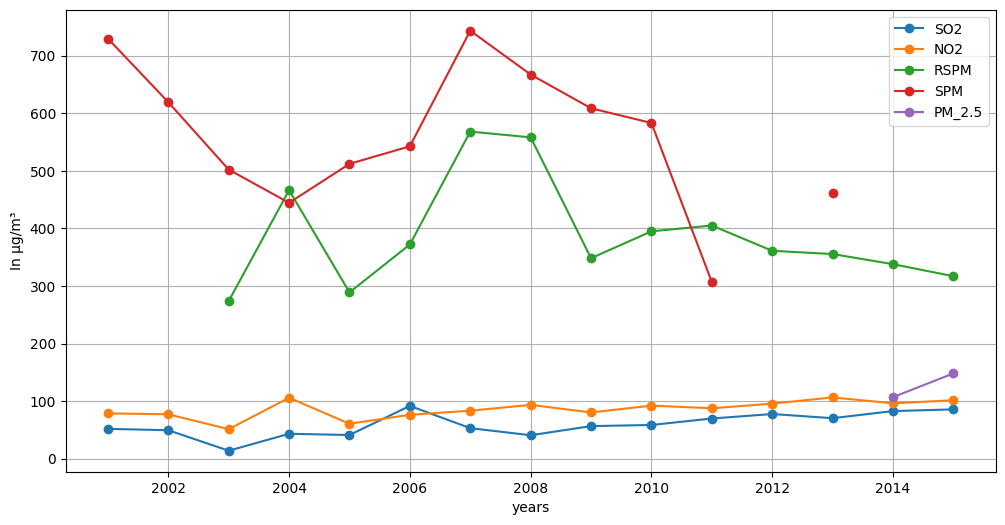

In [ ]:
Year_max.plot(x='Year', y=['SO2', 'NO2', 'RSPM', 'SPM','PM_2.5'], marker='o', figsize=(12,6))
plt.xlabel('years')
plt.ylabel('In µg/m³')
plt.grid(True)

**Combining each year with its mean of quantity of pollutant**

In [ ]:
Year_mean=o_pollution.groupby('Year')['SO2','NO2','RSPM','SPM','PM_2.5'].mean().reset_index()
Year_mean

<ipython-input-24-28303638a1b9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Year_mean=o_pollution.groupby('Year')['SO2','NO2','RSPM','SPM','PM_2.5'].mean().reset_index()


,Year,SO2,NO2,RSPM,SPM,PM_2.5
0,2001.0,17.148197,28.249892,NaN,264.166855,NaN
1,2002.0,14.395583,28.266942,NaN,218.360405,NaN
2,2003.0,5.423214,16.140536,71.510750,150.635833,NaN
3,2004.0,12.602073,29.719062,127.523262,188.255122,NaN
4,2005.0,12.581321,26.942152,113.434058,238.279572,NaN
5,2006.0,12.584632,25.737832,109.940290,231.933416,NaN
6,2007.0,12.054679,26.914024,110.972621,235.795933,NaN
7,2008.0,11.640632,27.125231,120.395246,249.136744,NaN
8,2009.0,11.263333,25.742164,121.109374,254.752469,NaN
9,2010.0,10.503041,24.913619,119.067215,260.711519,NaN


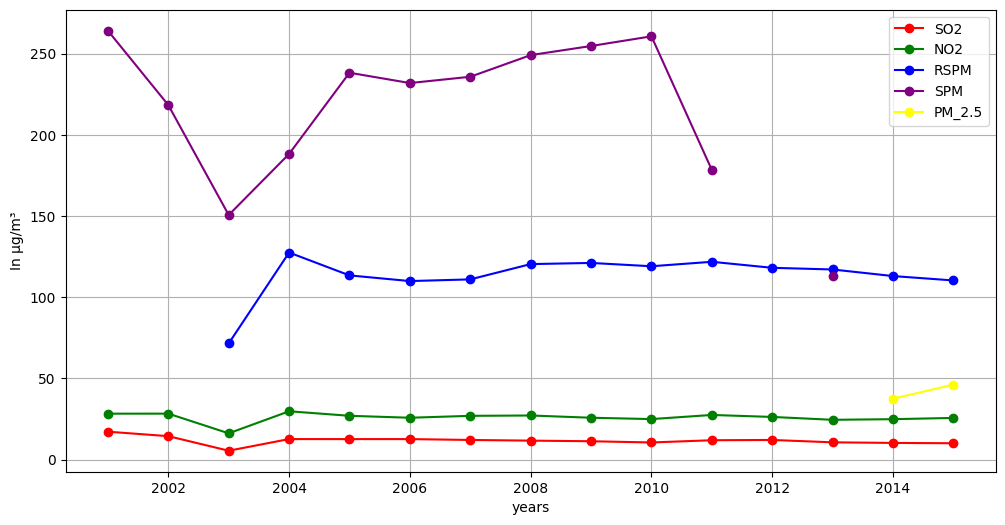

In [ ]:
colors = ['red', 'green', 'blue', 'purple','yellow']
Year_mean.plot(x='Year', y=['SO2', 'NO2', 'RSPM', 'SPM','PM_2.5'], marker='o',color=colors ,figsize=(12,6))
plt.xlabel('years')
plt.ylabel('In µg/m³')
plt.grid(True)

**Show data for SO2 & NO2 exceeding safe limit.**

In [ ]:
o_pollution[(o_pollution.SO2>80) | (o_pollution.NO2>80)]

,State,City,Area,Year,Season,SO2,NO2,RSPM,SPM,PM_2.5
254,Andhra Pradesh,Ramagundam,Residential and others,2006.0,Spring,91.70,14.10,50.00,261.00,NaN
255,Andhra Pradesh,Ramagundam,Residential and others,2006.0,Summer,91.10,25.20,156.00,295.00,NaN
1014,Delhi,Delhi,Industrial Area,2012.0,Autumn,9.30,89.04,274.09,NaN,NaN
1017,Delhi,Delhi,Industrial Area,2012.0,Winter,16.38,92.62,323.54,NaN,NaN
1018,Delhi,Delhi,Industrial Area,2013.0,Autumn,5.53,92.21,288.58,NaN,NaN
1019,Delhi,Delhi,Industrial Area,2013.0,Spring,5.42,84.17,292.83,NaN,NaN
1020,Delhi,Delhi,Industrial Area,2013.0,Summer,5.48,86.19,244.86,NaN,NaN
1021,Delhi,Delhi,Industrial Area,2013.0,Winter,4.50,90.75,355.38,NaN,NaN
1029,Delhi,Delhi,Industrial Area,2015.0,Winter,5.86,84.44,316.88,NaN,137.39
1090,Delhi,Delhi,"Residential, Rural and other Areas",2012.0,Autumn,4.87,91.70,219.15,NaN,NaN


In [ ]:
no2_so2=o_pollution[(o_pollution.SO2>80) | (o_pollution.NO2>80)].groupby('State')['City','Area'].value_counts().reset_index().rename(columns={0: 'Area_count'})
no2_so2

<ipython-input-27-20470c6c740f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  no2_so2=o_pollution[(o_pollution.SO2>80) | (o_pollution.NO2>80)].groupby('State')['City','Area'].value_counts().reset_index().rename(columns={0: 'Area_count'})


,State,City,Area,Area_count
0,Andhra Pradesh,Ramagundam,Residential and others,2
1,Delhi,Delhi,Industrial Area,7
2,Delhi,Delhi,"Residential, Rural and other Areas",6
3,Haryana,Faridabad,Industrial Area,1
4,Maharashtra,Nanded,Industrial Area,6
5,Maharashtra,Pune,Industrial Area,1
6,Maharashtra,Pune,"Residential, Rural and other Areas",1
7,Maharashtra,Ulhasnagar,"Residential, Rural and other Areas",1
8,Uttar Pradesh,Noida,Industrial Area,1
9,West Bengal,Kolkata,Industrial Area,12


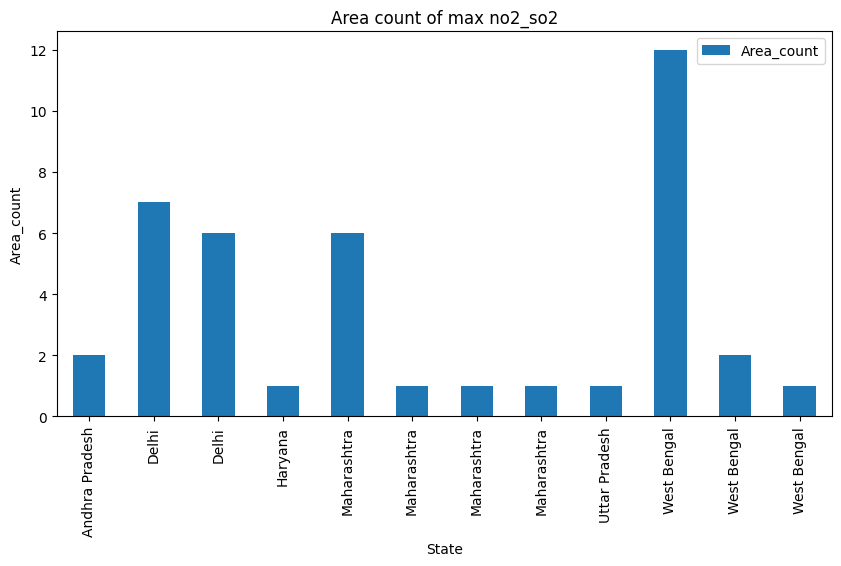

In [ ]:
no2_so2.plot(kind='bar',x='State', y='Area_count', figsize=(10,5))
plt.title("Area count of max no2_so2")
plt.ylabel('Area_count')
plt.xlabel('State');

**Show data for SPM & RSPM exceeding safe limit.**

In [ ]:
o_pollution[(o_pollution.SPM >200) | (o_pollution.RSPM>150)]

,State,City,Area,Year,Season,SO2,NO2,RSPM,SPM,PM_2.5
3,Andhra Pradesh,Eluru,"Residential, Rural and other Areas",2013.0,Winter,6.00,16.00,200.40,NaN,NaN
4,Andhra Pradesh,Eluru,"Residential, Rural and other Areas",2014.0,Autumn,NaN,NaN,154.47,NaN,NaN
12,Andhra Pradesh,Guntur,Residential and others,2009.0,Autumn,4.00,9.00,83.90,216.95,NaN
14,Andhra Pradesh,Guntur,Residential and others,2009.0,Summer,4.00,9.00,88.64,217.27,NaN
15,Andhra Pradesh,Guntur,Residential and others,2009.0,Winter,4.00,9.00,92.60,238.00,NaN
...,...,...,...,...,...,...,...,...,...,...
6617,West Bengal,Kolkata,"Residential, Rural and other Areas",2011.0,Winter,10.42,78.05,166.33,NaN,NaN
6621,West Bengal,Kolkata,"Residential, Rural and other Areas",2012.0,Winter,77.57,73.49,153.62,NaN,NaN
6625,West Bengal,Kolkata,"Residential, Rural and other Areas",2013.0,Winter,11.09,78.89,229.16,NaN,NaN
6629,West Bengal,Kolkata,"Residential, Rural and other Areas",2014.0,Winter,10.35,70.62,170.39,NaN,NaN


In [ ]:
o_pollution[(o_pollution.SPM >200) | (o_pollution.RSPM>150)].groupby('State')['City','Area'].value_counts().reset_index().rename(columns={0: 'Area_count'})

<ipython-input-30-6b49901f9462>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  o_pollution[(o_pollution.SPM >200) | (o_pollution.RSPM>150)].groupby('State')['City','Area'].value_counts().reset_index().rename(columns={0: 'Area_count'})


,State,City,Area,Area_count
0,Andhra Pradesh,Hyderabad,Industrial Area,27
1,Andhra Pradesh,Hyderabad,Residential and others,18
2,Andhra Pradesh,Ramagundam,Residential and others,15
3,Andhra Pradesh,Vijayawada,Industrial Area,15
4,Andhra Pradesh,Visakhapatnam,Residential and others,10
...,...,...,...,...
177,West Bengal,Kolkata,Residential and others,11
178,West Bengal,Kolkata,"Residential, Rural and other Areas",10
179,West Bengal,Durgapur,Industrial Area,9
180,West Bengal,Durgapur,"Residential, Rural and other Areas",7


In [ ]:
season=o_pollution[(o_pollution.Year==2015)].groupby('Season')['SO2','NO2','RSPM','SPM','PM_2.5'].mean().reset_index()
season

<ipython-input-49-14d8c6d7356e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season=o_pollution[(o_pollution.Year==2015)].groupby('Season')['SO2','NO2','RSPM','SPM','PM_2.5'].mean().reset_index()


,Season,SO2,NO2,RSPM,SPM,PM_2.5
0,Autumn,9.834452,26.317534,111.482550,NaN,49.298077
1,Spring,10.241615,25.215092,112.009321,NaN,43.395455
2,Summer,9.236667,23.196067,93.586382,NaN,38.772083
3,Winter,10.681768,27.647515,123.104634,NaN,51.713636


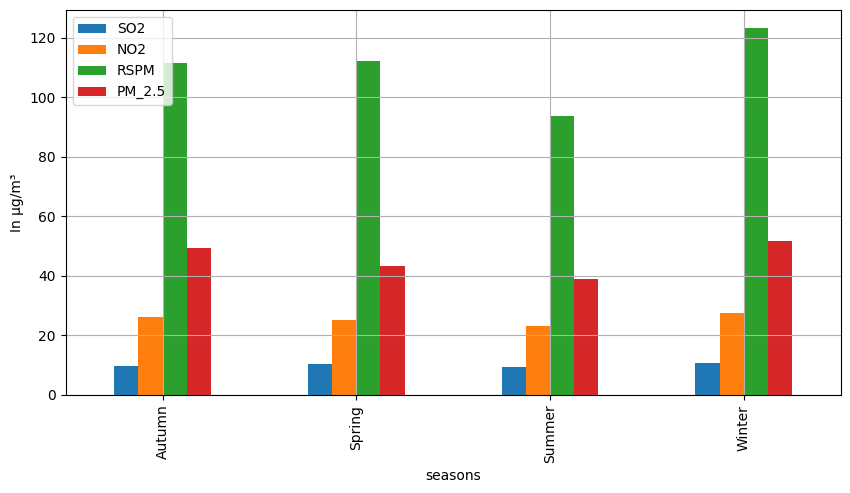

In [ ]:
season.plot( kind='bar',y=['SO2', 'NO2', 'RSPM','PM_2.5'], figsize=(10,5))
plt.xlabel('seasons')
plt.ylabel('In µg/m³')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

**Show data for rows having PM_2.5 count.**

In [ ]:
o_pollution[o_pollution['PM_2.5'].notnull()]

,State,City,Area,Year,Season,SO2,NO2,RSPM,SPM,PM_2.5
1026,Delhi,Delhi,Industrial Area,2015.0,Autumn,8.80,76.15,275.82,NaN,148.08
1027,Delhi,Delhi,Industrial Area,2015.0,Spring,5.85,72.89,257.48,NaN,77.36
1028,Delhi,Delhi,Industrial Area,2015.0,Summer,3.92,56.38,187.93,NaN,50.67
1029,Delhi,Delhi,Industrial Area,2015.0,Winter,5.86,84.44,316.88,NaN,137.39
1102,Delhi,Delhi,"Residential, Rural and other Areas",2015.0,Autumn,7.59,70.63,223.01,NaN,116.64
...,...,...,...,...,...,...,...,...,...,...
6584,West Bengal,Kolkata,RIRUO,2015.0,Summer,2.53,30.36,64.43,NaN,32.46
6585,West Bengal,Kolkata,RIRUO,2015.0,Winter,6.27,66.24,197.80,NaN,96.32
6630,West Bengal,Kolkata,"Residential, Rural and other Areas",2015.0,Autumn,4.91,50.39,101.60,NaN,64.50
6632,West Bengal,Kolkata,"Residential, Rural and other Areas",2015.0,Summer,3.00,33.67,47.25,NaN,28.51


**Data for PM_2.5 exceeding safe limit.**

In [ ]:
most_polluted=o_pollution[o_pollution['PM_2.5'] > 25]
most_polluted

,State,City,Area,Year,Season,SO2,NO2,RSPM,SPM,PM_2.5
1026,Delhi,Delhi,Industrial Area,2015.0,Autumn,8.80,76.15,275.82,NaN,148.08
1027,Delhi,Delhi,Industrial Area,2015.0,Spring,5.85,72.89,257.48,NaN,77.36
1028,Delhi,Delhi,Industrial Area,2015.0,Summer,3.92,56.38,187.93,NaN,50.67
1029,Delhi,Delhi,Industrial Area,2015.0,Winter,5.86,84.44,316.88,NaN,137.39
1102,Delhi,Delhi,"Residential, Rural and other Areas",2015.0,Autumn,7.59,70.63,223.01,NaN,116.64
...,...,...,...,...,...,...,...,...,...,...
6584,West Bengal,Kolkata,RIRUO,2015.0,Summer,2.53,30.36,64.43,NaN,32.46
6585,West Bengal,Kolkata,RIRUO,2015.0,Winter,6.27,66.24,197.80,NaN,96.32
6630,West Bengal,Kolkata,"Residential, Rural and other Areas",2015.0,Autumn,4.91,50.39,101.60,NaN,64.50
6632,West Bengal,Kolkata,"Residential, Rural and other Areas",2015.0,Summer,3.00,33.67,47.25,NaN,28.51


In [ ]:
mp=most_polluted.groupby(['State','Season'])['PM_2.5'].mean().reset_index()
mp

,State,Season,PM_2.5
0,Delhi,Autumn,132.360000
1,Delhi,Spring,77.025000
2,Delhi,Summer,65.155000
3,Delhi,Winter,121.025000
4,Gujarat,Autumn,32.095000
5,Gujarat,Spring,32.078000
6,Gujarat,Summer,32.166667
7,Gujarat,Winter,29.252500
8,Madhya Pradesh,Autumn,47.532857
9,Madhya Pradesh,Spring,62.128750


## **Question_Answer**

**1.Which year and place had highest probability of having acid rain in 2015 and 2014.**

In [ ]:
o_pollution[(o_pollution.SO2 >85)&(o_pollution.NO2 >85)]

**2.Which year had maximum RSPM.**

In [ ]:
o_pollution[o_pollution.RSPM==(Year_max.RSPM.max())]

**3.Most polluted city in 2015.**

In [ ]:
o_pollution[o_pollution['PM_2.5'] == (most_polluted['PM_2.5'].max())]

**4.Show the difference in consecutive years in pollutents.**

In [ ]:
Year_mean[['SO2_Diff','NO2_Diff','RSPM_Diff','SPM_Diff']] = Year_mean[['SO2','NO2','RSPM','SPM']].diff()
Year_mean